In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from fredeco.fredData import fred_list_series,fred_multi_series,fred_info_series,fred_series
from fredeco.fredSearch import fred_search,fred_list_series


In [4]:
myfred_api='82d9884c5a1d1e4a13053f180e201290'

In [8]:
df_gdp=fred_series(fred_api=myfred_api,series='CLVMNACNSAB1GQIE',frequency='q')

In [26]:
df_gdp.index#==pd.to_datetime('2008-12-01')

Index(['1995-01-01', '1995-04-01', '1995-07-01', '1995-10-01', '1996-01-01',
       '1996-04-01', '1996-07-01', '1996-10-01', '1997-01-01', '1997-04-01',
       ...
       '2021-01-01', '2021-04-01', '2021-07-01', '2021-10-01', '2022-01-01',
       '2022-04-01', '2022-07-01', '2022-10-01', '2023-01-01', '2023-04-01'],
      dtype='object', name='Dates', length=114)

In [61]:
df_gdp.pct_change(4)[list(df_gdp.index=='2009-01-01')]*100,df_gdp.pct_change(4)[list(df_gdp.index=='2015-04-01')]*100
# list(df_gdp.index=='2008-01-01')


(            CLVMNACNSAB1GQIE
 Dates                       
 2009-01-01         -7.137578,
             CLVMNACNSAB1GQIE
 Dates                       
 2015-04-01          20.67522)

In [62]:
# The data reached an all-time high of 26.6 % in Mar 2015 and a record low of -9.6 % in Dec 2008.
df_gdp.pct_change(4).max()*100, df_gdp.pct_change(4).min()*100

(CLVMNACNSAB1GQIE    28.603914
 dtype: float64,
 CLVMNACNSAB1GQIE   -10.28842
 dtype: float64)

<Axes: xlabel='Dates'>

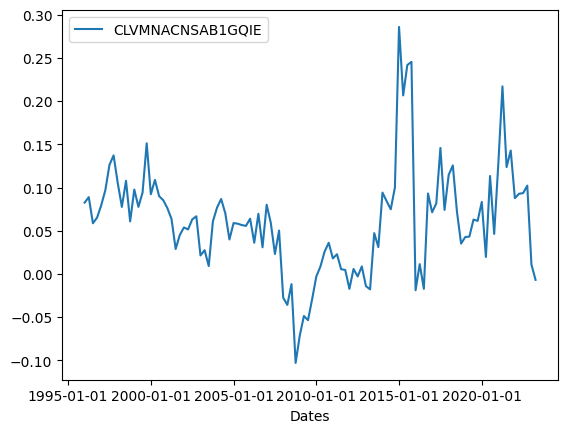

In [63]:
df_gdp.pct_change(4).plot()

In [71]:
df_gdp.pct_change(1).tail()*100

,CLVMNACNSAB1GQIE
Dates,
2022-04-01,3.738994
2022-07-01,8.068249
2022-10-01,-2.887461
2023-01-01,-7.129060
2023-04-01,1.911387


In [42]:
# dfg=pd.read_excel("API_NY.GDP.MKTP.CD_DS2_en_excel_v2_5795872.xls") # GDP
dfg=pd.read_excel("API_NY.GDP.PCAP.CD_DS2_en_excel_v2_5871574.xls")    # GDP per capita

dfg.columns=dfg.iloc[2,:]
dfg=dfg.set_index('Country Name')
dfg.head()

2,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
Country Name,,,,,,,,,,,,,,,,,,,,,
Last Updated Date,2023-09-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country Name,Country Code,Indicator Name,Indicator Code,1960.000000,1961.000000,1962.000000,1963.000000,1964.000000,1965.000000,1966.000000,...,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020.000000,2021.000000,2022.00000
Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26515.678080,26942.307976,28421.386493,28451.273745,29326.708058,30918.515218,31902.762582,24487.863569,29342.100730,NaN
Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,161.638982,161.111657,170.538537,198.038919,178.019217,196.818756,207.945574,...,1736.222507,1724.534381,1545.559084,1436.094404,1613.668488,1550.111762,1499.954437,1353.927527,1539.165543,1622.39172


In [43]:
dfg1=dfg.iloc[3:,3:]
dfg1.columns=[int(i) for i in dfg1.columns]
dfg1.head(3)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26515.678080,26942.307976,28421.386493,28451.273745,29326.708058,30918.515218,31902.762582,24487.863569,29342.100730,NaN
Africa Eastern and Southern,161.638982,161.111657,170.538537,198.038919,178.019217,196.818756,207.945574,210.149894,223.040659,248.44822,...,1736.222507,1724.534381,1545.559084,1436.094404,1613.668488,1550.111762,1499.954437,1353.927527,1539.165543,1622.39172
Afghanistan,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,143.103233,167.165675,134.012768,134.25036,...,651.987862,628.146804,592.476165,520.251955,530.149863,502.057099,500.522981,516.866797,363.674087,NaN


In [44]:
# dfg1=dfg.transpose().iloc[3:,3:]
# dfg1['Year']=[int(i) for i in dfg1.index]
# dfg1=dfg1.set_index('Year')
# dfg1.columns=list(dfg1.columns)
# dfg1.tail()

In [45]:
# df_countries=pd.read_excel("API_NY.GDP.MKTP.CD_DS2_en_excel_v2_5795872.xls",sheet_name='Metadata - Countries')
df_countries=pd.read_excel("API_NY.GDP.PCAP.CD_DS2_en_excel_v2_5871574.xls",sheet_name='Metadata - Countries')
df_countries.head(3)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan


In [46]:
set(df_countries.Region)

{'East Asia & Pacific',
 'Europe & Central Asia',
 'Latin America & Caribbean',
 'Middle East & North Africa',
 'North America',
 'South Asia',
 'Sub-Saharan Africa',
 nan}

In [47]:
# select only countries of Region Sub-Saharan Africa.
lafrica_countries=df_countries[df_countries['Region']=='Sub-Saharan Africa'].TableName.tolist()
lafrica_countries[:5]

['Angola', 'Burundi', 'Benin', 'Burkina Faso', 'Botswana']

In [48]:
# select countries from Sub-Sahara

# make the list of these countries
dfg1_Africa=dfg1[[i in lafrica_countries for i in dfg1.index]]
# dfg1_Africa=dfg1_Africa.sort_values('2022')
dfg1_Africa.head(3)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country Name,,,,,,,,,,,,,,,,,,,,,
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1502.950754,1903.717405,2998.501158
Burundi,71.360224,72.088782,73.942008,78.948269,85.964725,50.990420,51.808640,54.450305,54.647466,55.543775,...,241.547666,257.818557,289.359627,242.539527,244.145422,232.060617,216.972971,216.827417,221.157803,238.441876
Benin,90.035831,92.374860,91.171392,96.254664,100.468088,105.966856,108.628227,107.682862,112.477968,111.695273,...,1214.295566,1251.504765,1041.652523,1049.820303,1095.274459,1194.438214,1170.965533,1237.949295,1361.100749,1303.222014


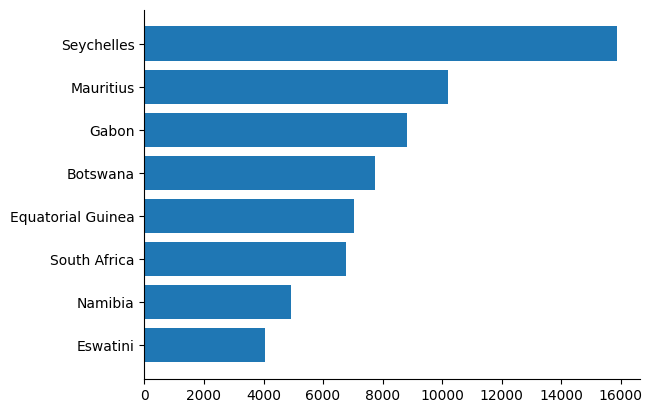

In [96]:
dfg1_Africa1=dfg1_Africa.sort_values(2022,ascending=True)[-10::]

fig=plt.subplot()
plt.barh(dfg1_Africa1[2022].index,dfg1_Africa1[2022])
fig.spines[['top','right']].set_visible(False)

In [85]:
dfg1_Africa1[2022]

Country Name
Congo, Rep.                 2447.988989
Mauritania                  2190.700205
Nigeria                     2184.421493
Ghana                       2175.859770
Kenya                       2099.301938
Senegal                     1598.735991
Cameroon                    1588.478723
Guinea                      1531.656475
Zambia                      1487.907764
Comoros                     1484.892465
Benin                       1303.222014
Zimbabwe                    1266.996031
Tanzania                    1192.403809
Lesotho                     1107.395298
Sudan                       1102.146484
Ethiopia                    1027.585918
Rwanda                       966.327110
Uganda                       964.224385
Togo                         918.376756
Gambia, The                  840.010193
Mali                         833.297255
Burkina Faso                 832.884266
Guinea-Bissau                775.828966
Liberia                      754.532877
Chad                       